In [1]:
pip install pandas numpy matplotlib yfinance scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Fetch historical stock data from Yahoo Finance
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2023-01-01"
stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Preprocessing the data
data = stock_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Create sequences and labels for LSTM
sequence_length = 60
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, 0])
    y.append(scaled_data[i+sequence_length, 0])

X, y = np.array(X), np.array(y)

In [6]:
# Reshape the data for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
49/49 [==============================] - 5s 37ms/step - loss: 0.0106
Epoch 2/20
49/49 [==============================] - 2s 37ms/step - loss: 3.7844e-04
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 3.4950e-04
Epoch 4/20
49/49 [==============================] - 2s 39ms/step - loss: 3.3817e-04
Epoch 5/20
49/49 [==============================] - 2s 51ms/step - loss: 3.0755e-04
Epoch 6/20
49/49 [==============================] - 2s 50ms/step - loss: 3.0090e-04
Epoch 7/20
49/49 [==============================] - 3s 54ms/step - loss: 2.9435e-04
Epoch 8/20
49/49 [==============================] - 3s 53ms/step - loss: 3.2364e-04
Epoch 9/20
49/49 [==============================] - 2s 50ms/step - loss: 2.9528e-04
Epoch 10/20
49/49 [==============================] - 3s 53ms/step - loss: 2.4975e-04
Epoch 11/20
49/49 [==============================] - 2s 51ms/step - loss: 2.5154e-04
Epoch 12/20
49/49 [==============================] - 2s 50ms/step - loss: 2.59

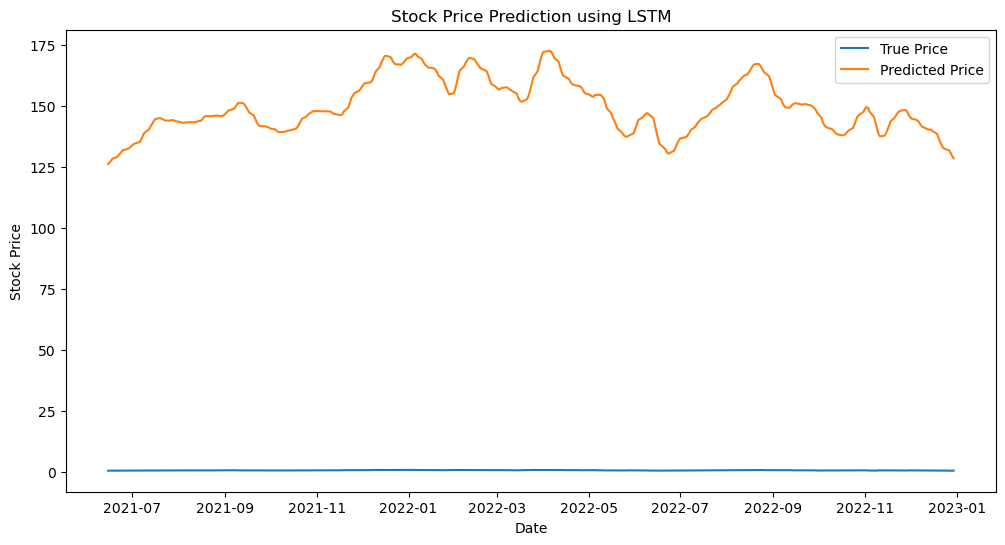

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(y_test):], y_test, label='True Price')
plt.plot(stock_data.index[-len(y_test):], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()